In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
df_train = pd.read_csv('train.csv')
df_stores = pd.read_csv('stores.csv')
df_transactions = pd.read_csv('transactions.csv')
df_oil = pd.read_csv('oil.csv')
df_holiday_events = pd.read_csv('holidays_events.csv')

In [4]:
df_holiday_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [6]:
df_train['date'] = pd.to_datetime(df_train.date)

In [7]:
df_train.sales[df_train.sales==0].count()

939130

In [8]:
train = df_train[df_train.sales!=0]

In [9]:
train = pd.DataFrame(df_train.groupby(['date', 'store_nbr']).sales.sum())
train = train[train.sales!=0].reset_index()

In [10]:
train['date'] = pd.to_datetime(train.date)

In [11]:
pd.date_range(start = '2013-01-01', end = '2017-08-15' ).difference(train.date.unique())

DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]', freq=None)

In [12]:
a = pd.DataFrame(df_train.groupby(['store_nbr', 'family'])['sales'].sum()).reset_index()
a[['sales','family']][a.store_nbr == 1].set_index('family')
a.head()

,store_nbr,family,sales
0,1,AUTOMOTIVE,5475.0
1,1,BABY CARE,0.0
2,1,BEAUTY,4056.0
3,1,BEVERAGES,2673769.0
4,1,BOOKS,211.0


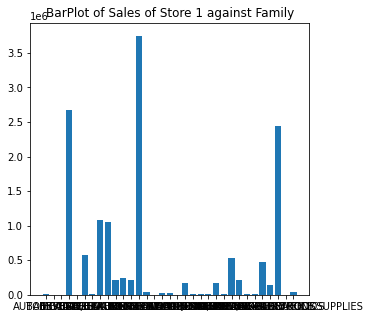

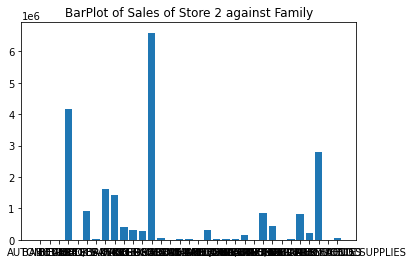

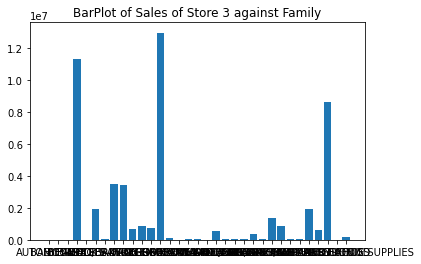

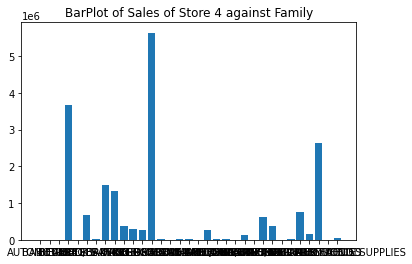

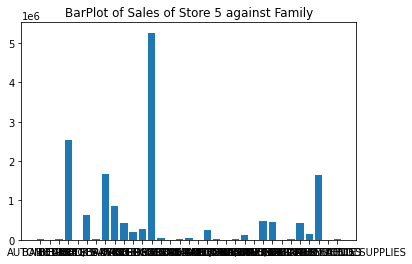

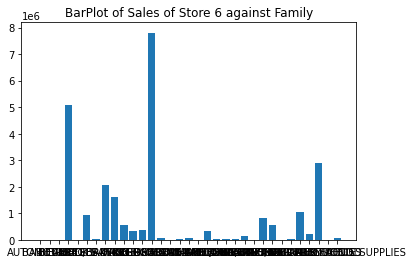

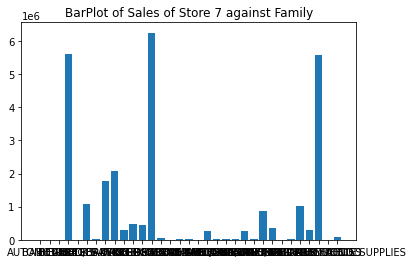

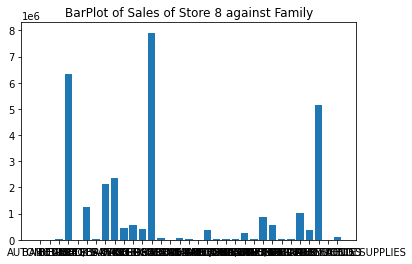

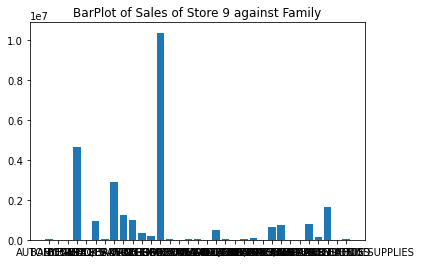

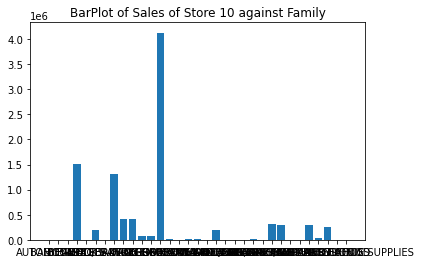

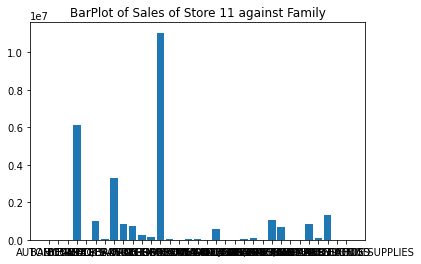

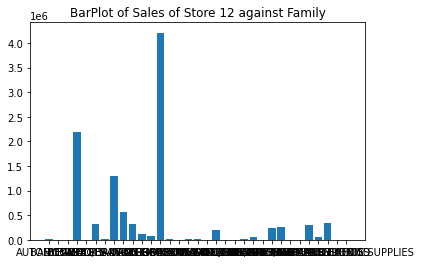

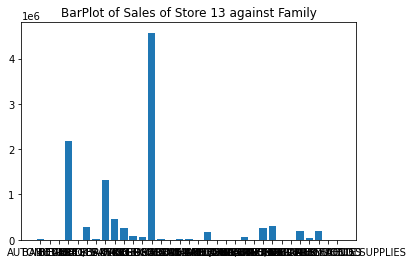

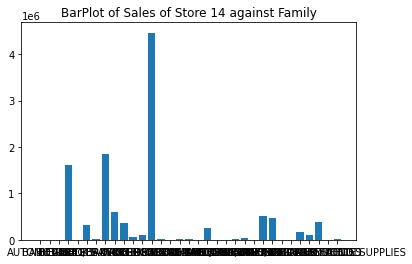

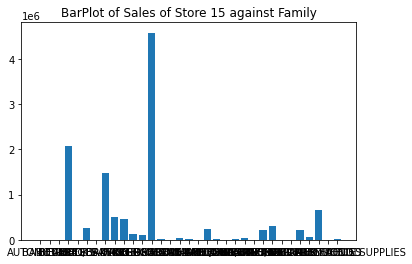

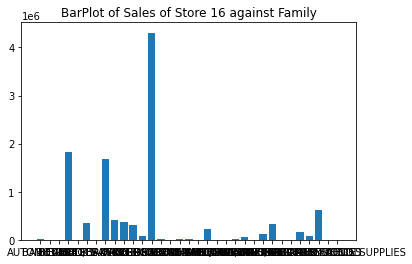

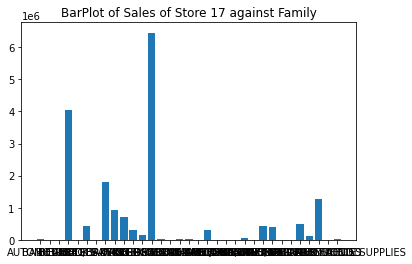

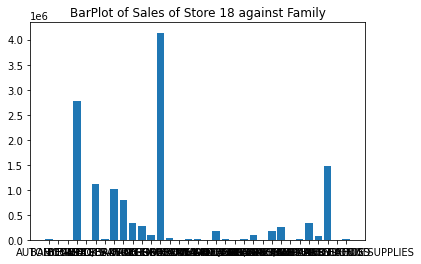

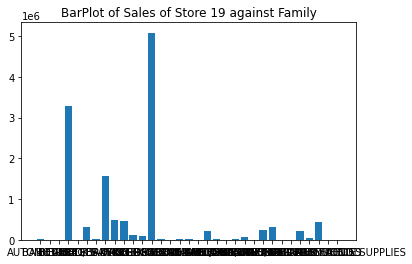

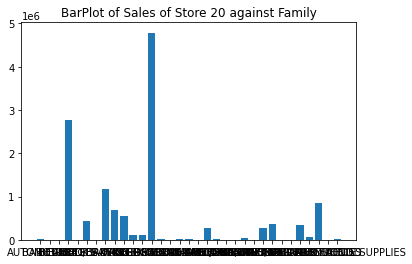

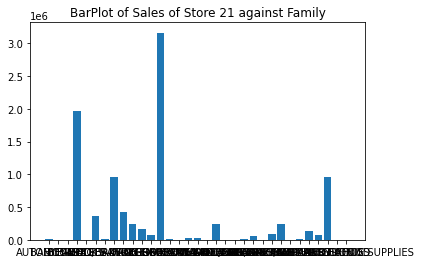

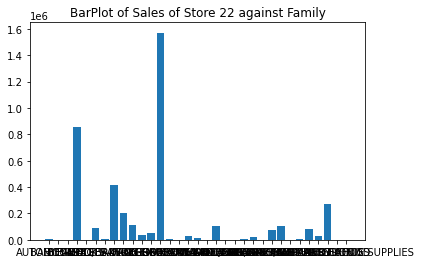

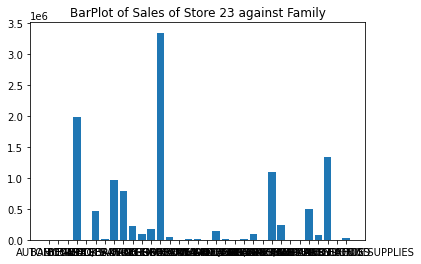

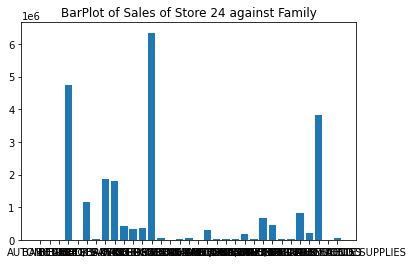

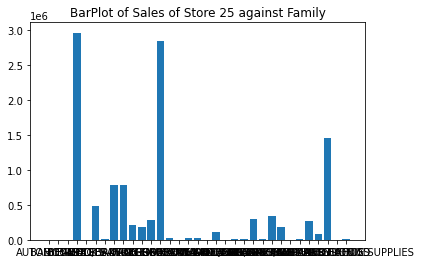

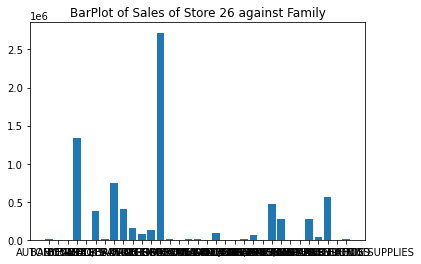

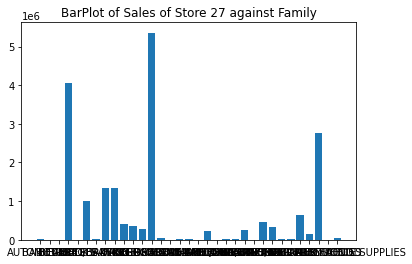

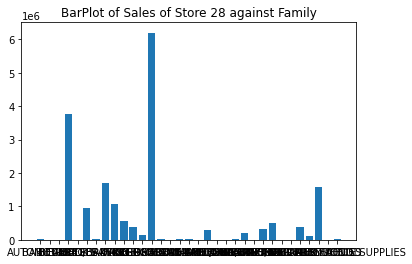

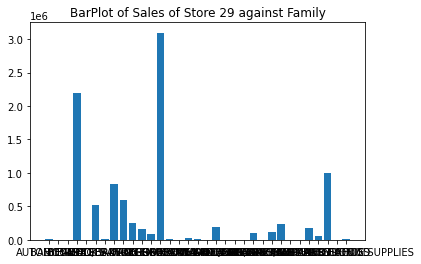

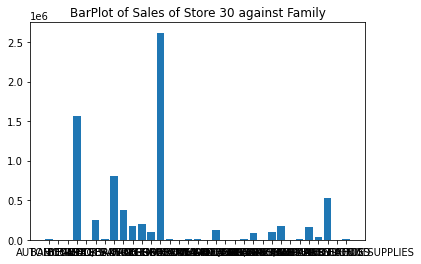

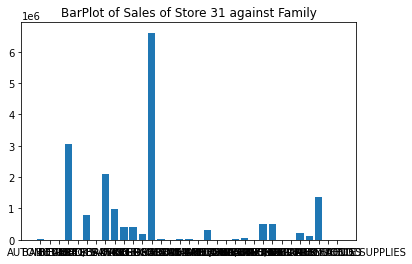

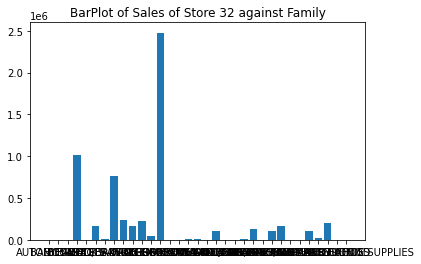

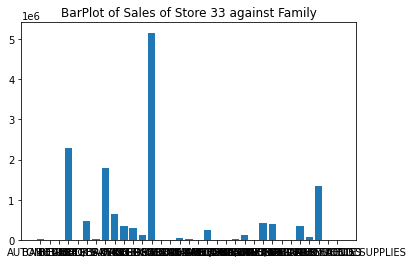

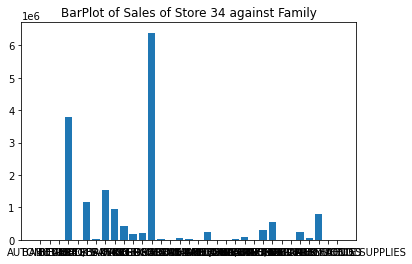

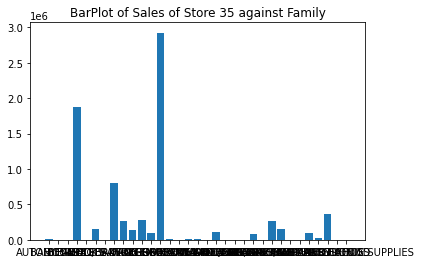

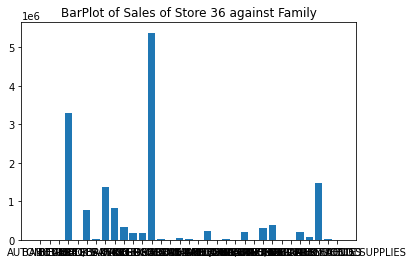

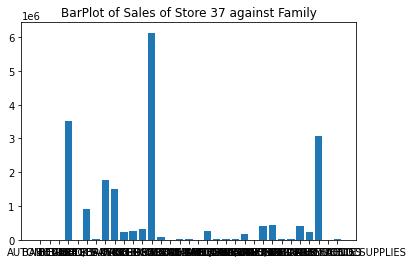

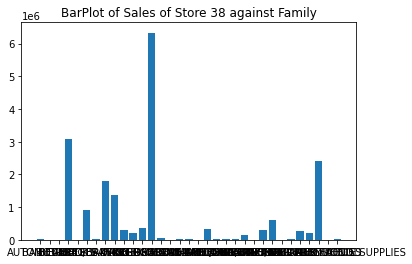

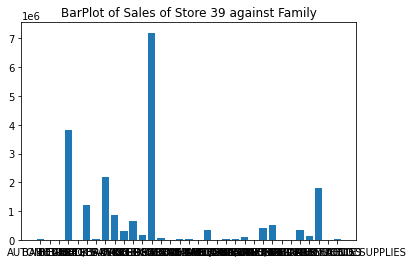

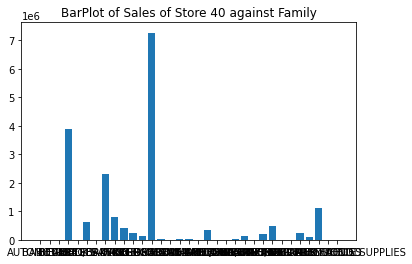

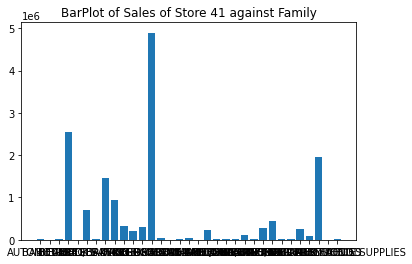

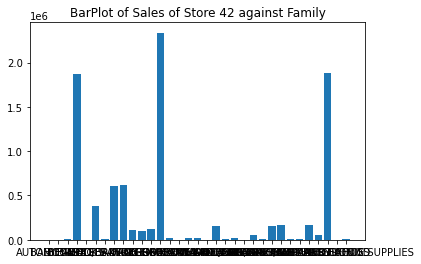

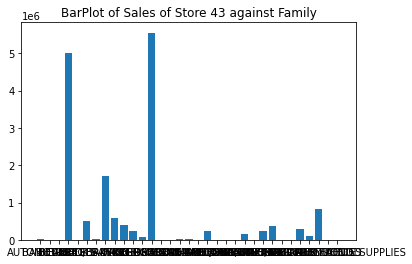

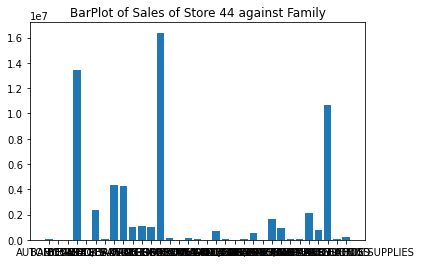

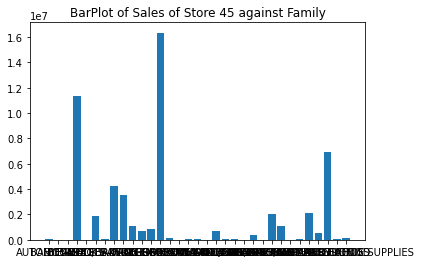

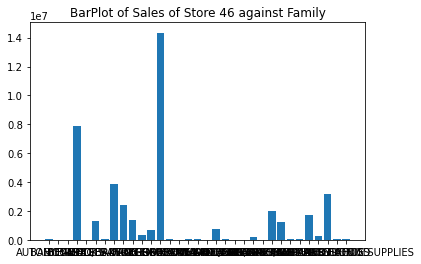

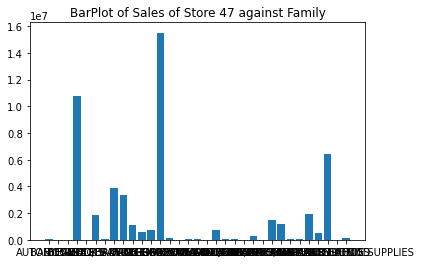

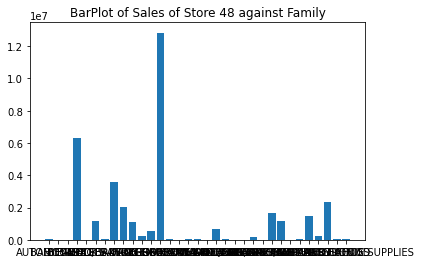

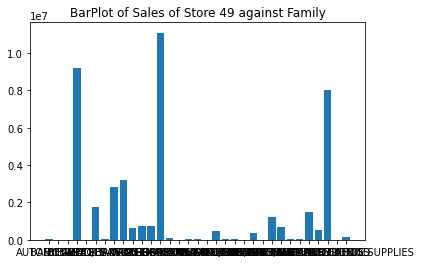

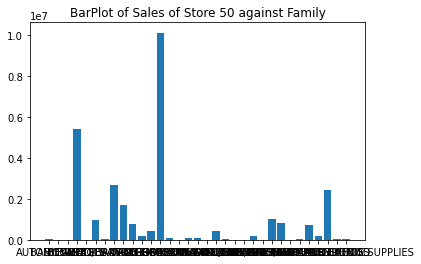

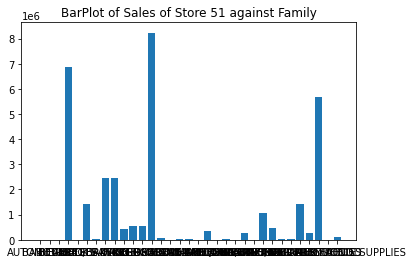

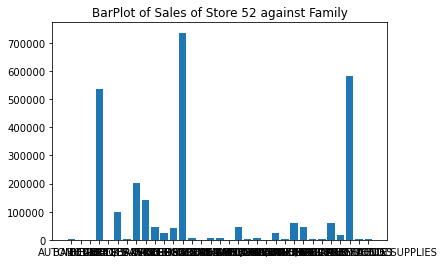

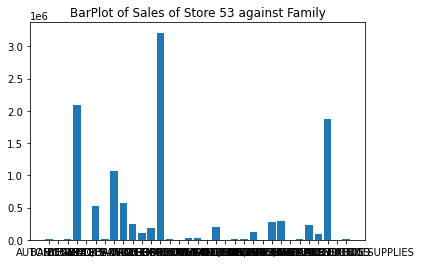

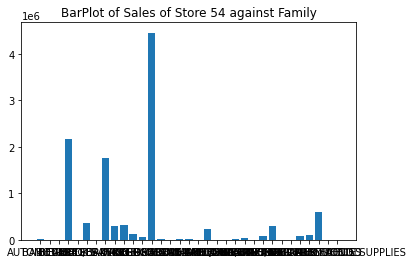

In [13]:
fig = plt.figure(figsize=(5,5))

for i in range(1,55):
    plt.bar((a[['sales','family']][a.store_nbr == i].set_index('family')).index,a['sales'][a.store_nbr == i])
    plt.title('BarPlot of Sales of Store {} against Family'.format(i))
    plt.show()
    

In [14]:
train.head()

,date,store_nbr,sales
0,2013-01-01,25,2511.618999
1,2013-01-02,1,7417.148000
2,2013-01-02,2,10266.718981
3,2013-01-02,3,24060.348000
4,2013-01-02,4,10200.083980


In [15]:
a = pd.DataFrame(df_train.groupby(['date', 'store_nbr', 'family'])['sales', 'onpromotion'].sum())
print(a.shape)
a = a[a['sales'] != 0]
a.shape

<ipython-input-15-2e368f0653ca>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  a = pd.DataFrame(df_train.groupby(['date', 'store_nbr', 'family'])['sales', 'onpromotion'].sum())


(3000888, 2)


(2061758, 2)

In [16]:
a[a.onpromotion !=0]

sales  onpromotion
date       store_nbr family                                   
2014-04-01 9         CLEANING          1752.00000            3
                     GROCERY I         7685.00000            5
2014-04-02 9         GROCERY I         6481.00000            3
                     POULTRY            613.71704            1
2014-04-03 9         BREAD/BAKERY       521.00000            1
...                                           ...          ...
2017-08-15 54        GROCERY I         4235.00000           44
                     HOME CARE          202.00000            7
                     LIQUOR,WINE,BEER   210.00000            2
                     PERSONAL CARE      169.00000            5
                     PRODUCE            915.37100           76

[611312 rows x 2 columns]

In [18]:
stores = df_stores.copy()

In [19]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [20]:
stores.groupby(['state', 'city', 'store_nbr', ])['cluster', 'type'].count()

<ipython-input-20-3be4a28416a2>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  stores.groupby(['state', 'city', 'store_nbr', ])['cluster', 'type'].count()


cluster  type
state                          city          store_nbr               
Azuay                          Cuenca        37               1     1
                                             39               1     1
                                             42               1     1
Bolivar                        Guaranda      19               1     1
Chimborazo                     Riobamba      14               1     1
Cotopaxi                       Latacunga     12               1     1
                                             13               1     1
El Oro                         Machala       40               1     1
                                             41               1     1
Esmeraldas                     Esmeraldas    43               1     1
Guayas                         Daule         27               1     1
                               Guayaquil     24               1     1
                                             26               1     1
                                             28               1     1
                                             29               1     1
                                             30               1     1
                                             32               1     1
                                             34               1     1
                                             51               1     1
                               Libertad      36               1     1
                               Playas        35               1     1
Imbabura                       Ibarra        15               1     1
Loja                           Loja          38               1     1
Los Rios                       Babahoyo      31               1     1
                               Quevedo       33               1     1
Manabi                         El Carmen     54               1     1
                               Manta         52               1     1
                                             53               1     1
Pastaza                        Puyo          22               1     1
Pichincha                      Cayambe       11               1     1
                               Quito         1                1     1
                                             2                1     1
                                             3                1     1
                                             4                1     1
                                             6                1     1
                                             7                1     1
                                             8                1     1
                                             9                1     1
                                             10               1     1
                                             17               1     1
                                             18               1     1
                                             20               1     1
                                             44               1     1
                                             45               1     1
                                             46               1     1
                                             47               1     1
                                             48               1     1
                                             49               1     1
Santa Elena                    Salinas       25               1     1
Santo Domingo de los Tsachilas Santo Domingo 5                1     1
                                             16               1     1
                                             21               1     1
Tungurahua                     Ambato        23               1     1
                                             50               1     1

In [21]:
df_train.groupby(['date', 'store_nbr']).sales.sum()

date        store_nbr
2013-01-01  1                0.000000
            2                0.000000
            3                0.000000
            4                0.000000
            5                0.000000
                             ...     
2017-08-15  50           16879.121004
            51           20154.559000
            52           18600.046000
            53            8208.189000
            54           12666.858000
Name: sales, Length: 90936, dtype: float64

In [22]:
from datetime import datetime as dt

In [23]:
df_train['date'] = pd.to_datetime(df_train['date'])

In [24]:
df_train['year'] = df_train['date'].dt.year

In [25]:
b = pd.DataFrame(df_train.groupby(['store_nbr', 'year'])['sales'].sum()).reset_index().set_index('year')
b.head()

,store_nbr,sales
year,,
2013,1,1.894713e+06
2014,1,2.899710e+06
2015,1,3.120580e+06
2016,1,3.793493e+06
2017,1,2.436518e+06


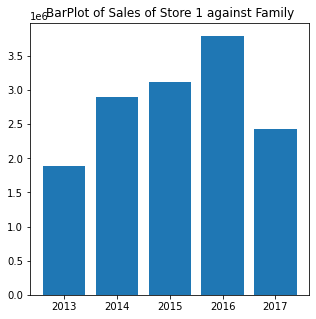

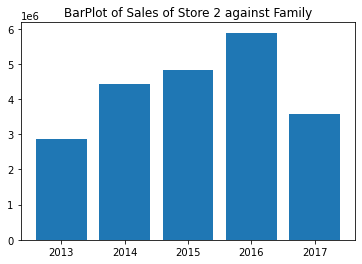

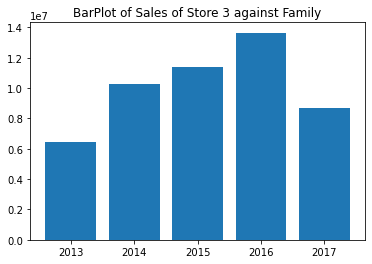

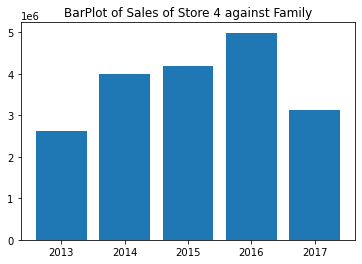

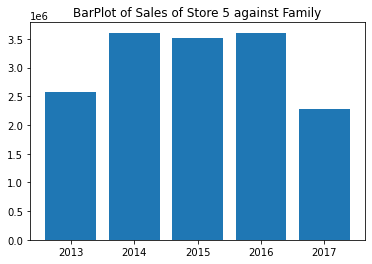

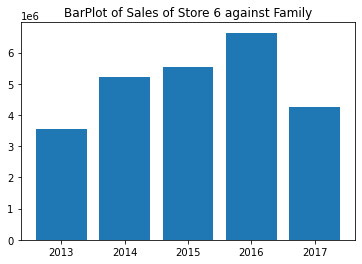

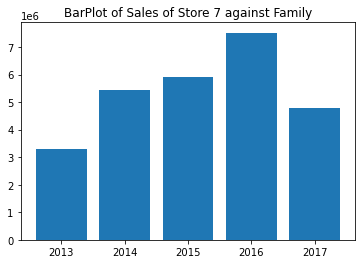

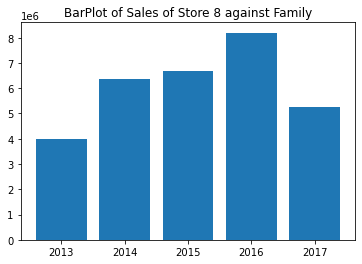

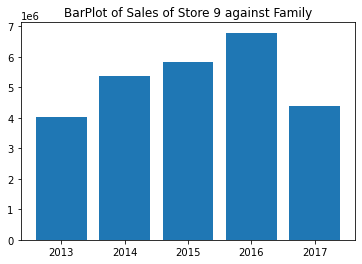

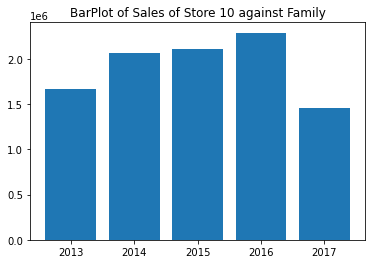

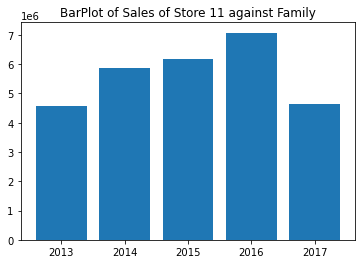

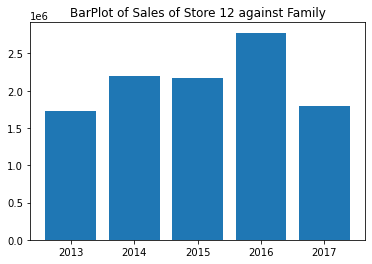

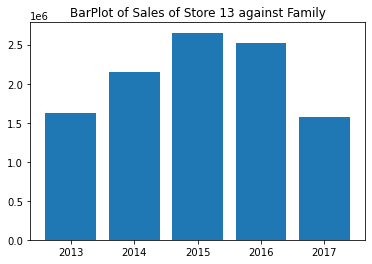

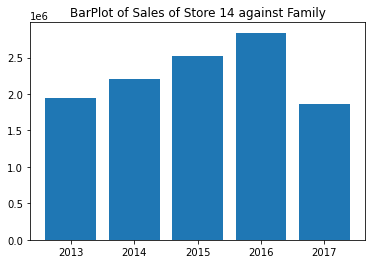

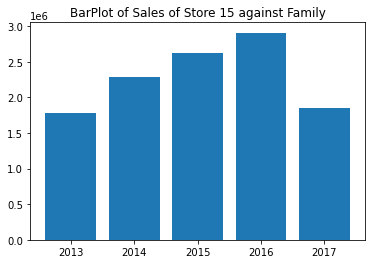

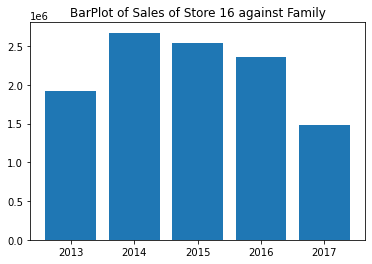

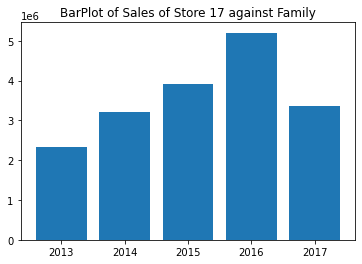

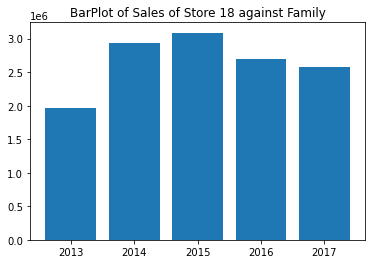

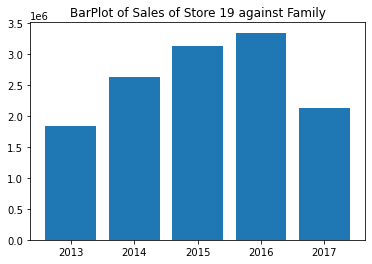

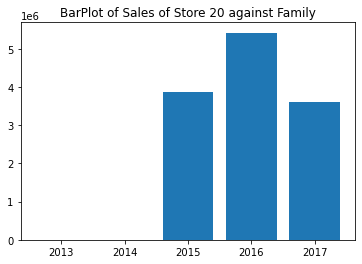

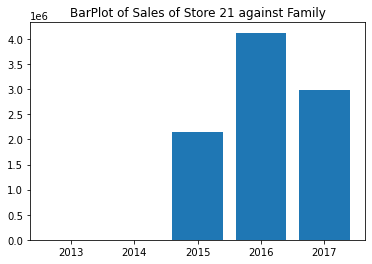

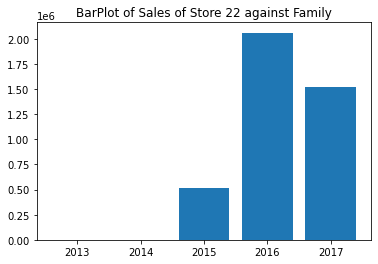

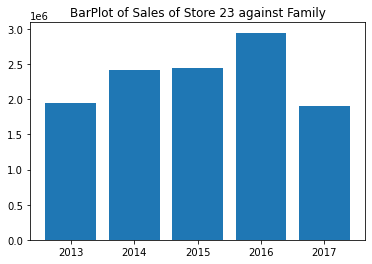

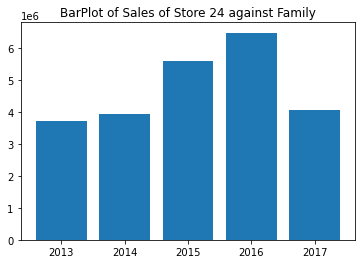

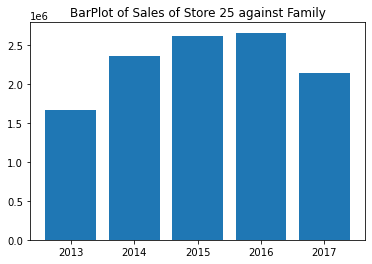

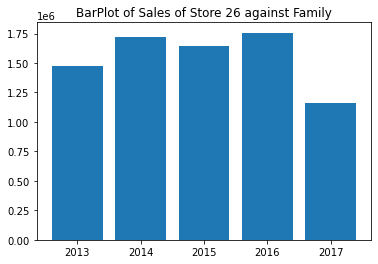

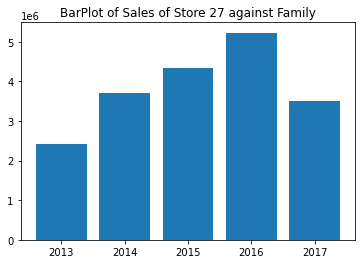

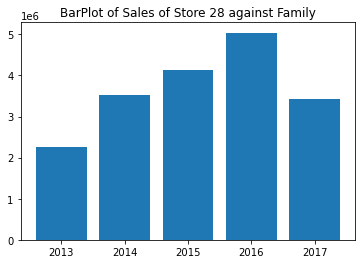

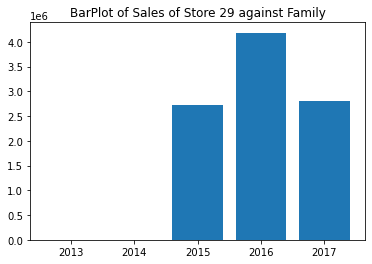

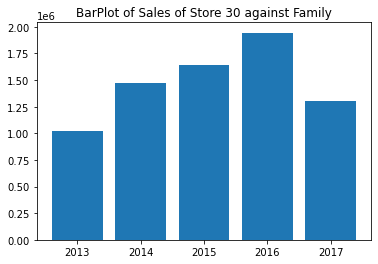

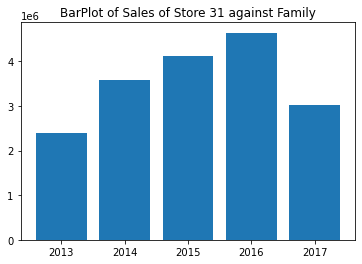

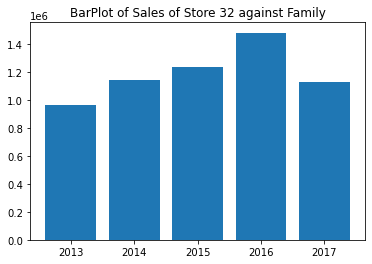

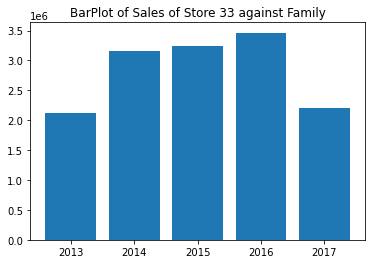

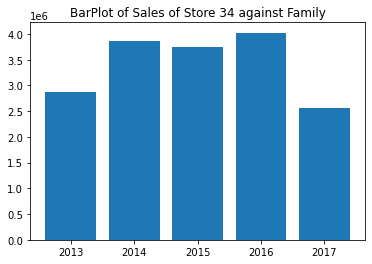

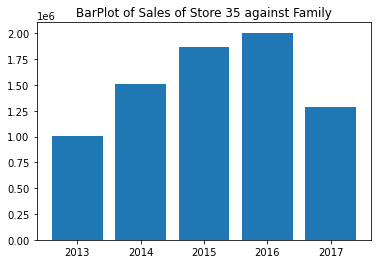

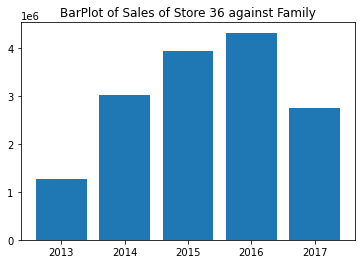

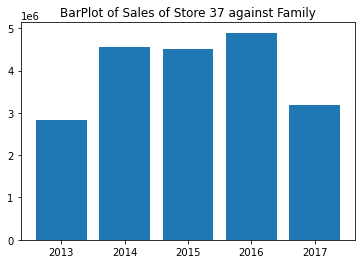

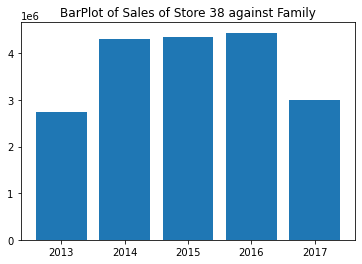

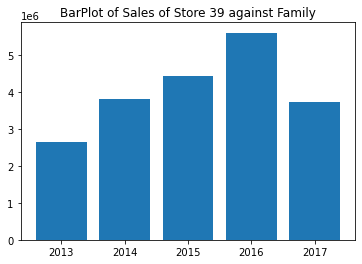

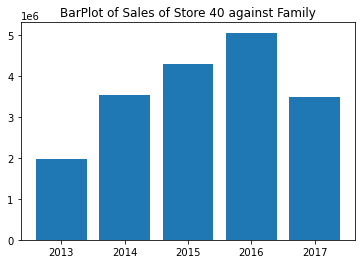

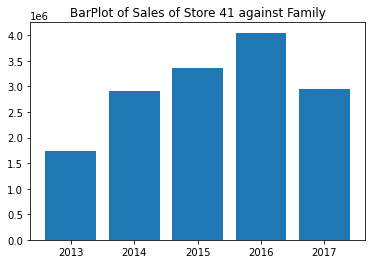

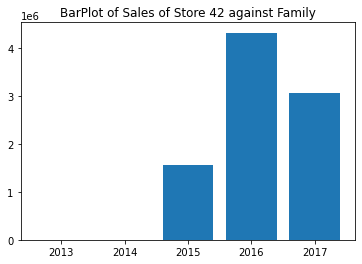

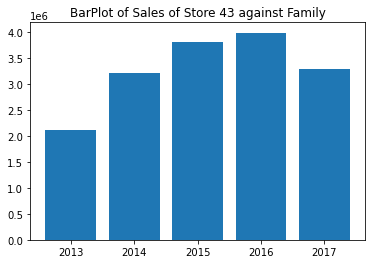

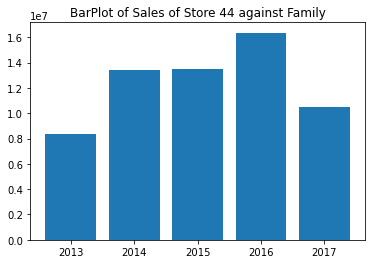

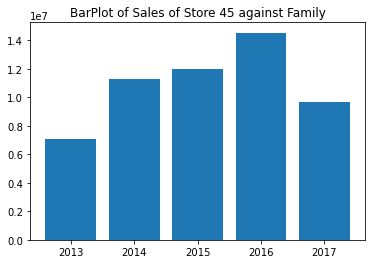

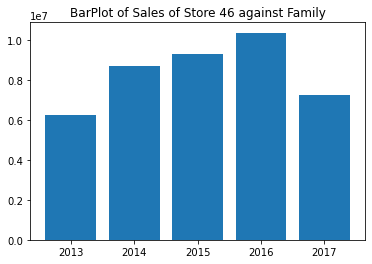

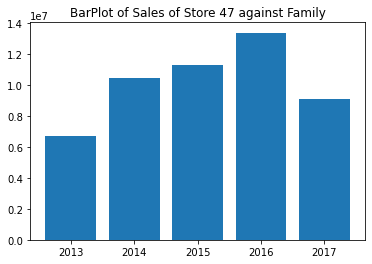

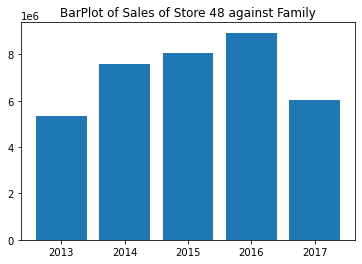

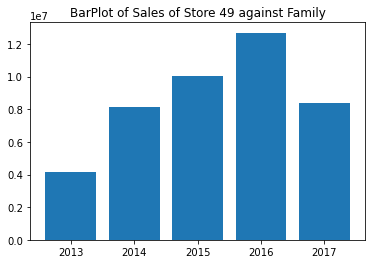

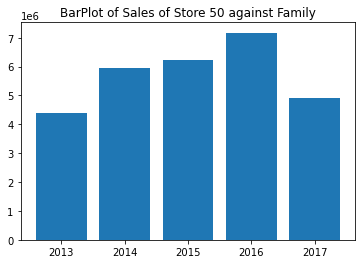

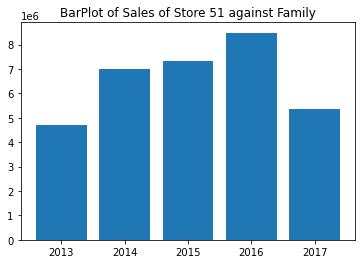

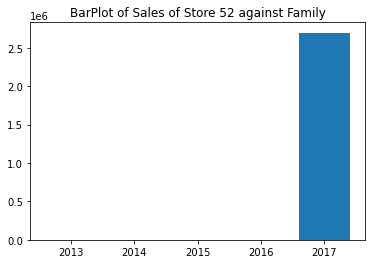

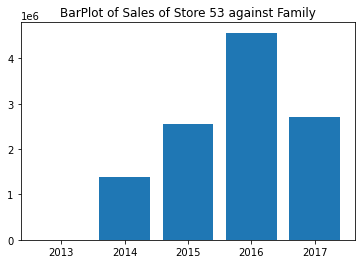

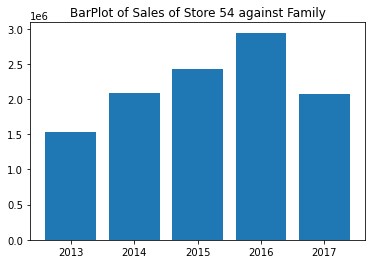

In [26]:
fig = plt.figure(figsize=(5,5))
for i in range(1,55):
    plt.bar(b[b.store_nbr == i].index,b['sales'][b.store_nbr == i])
    plt.title('BarPlot of Sales of Store {} against Family'.format(i))
    plt.show()
    plt.show()